# House Price Prediction

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## 1. Prediction
Prediction is a statement about a future event. A prediction is often, but not always, based upon experience or knowledge. We know that future events are necessarily uncertain, so guatanteed accurate information about the future is in many cases impossible, but prediction can be useful to assist in making plans about possible developments. For example, weather prediction can help us choose suitable clothes for the next day. Here, we would like to predict the house price, assisting related decisions. 

## 2. House Price

House price is a matter of considerable public concern. It is close to people's daily life and also has great impact on a economy. Therefore, predicting the future house price is important for people, company and government to make decisions. Here are many causes influencing house price. In statistic, we use regression analysis to solve it.

## 3. Liner Regression

Linear regression is a linear appoach to modeling the relationship between a scalar response (response variable or dependent variable) and one or more explanary variables (predictor variable or independent variable).  
The general expression of linear regression is:  
$$Y = a_0 + a_1X_1 + a_2X_2 + a_3X_3 + \epsilon$$


There are five keys assumptions for linear regression.

**Linear Relationship**: Linear regression needs the relationship between the independent and dependent variables to be linear.

** Multivariabte Normality**: The linear regression analysis requires all variables to be multivariate normal.

**No or little multicollinearity**: Linear regression assumes that there is little or no multicollinearity in the data.

**No auto-correlation**: Linear regression analysis requires that there is little or no autocorrelation in the data.

**Constant Variances**: The linear regression analysis makes is homoscedasticity.

### Example 1. House price prediction with house size (Simple Linear Regression)

In this case, we know one dependent variable **house price** and one explanary variable **house size**. The one with only one explanary varibale is called **Simple Linear Regression**. We would like to establish a simple linear regression model based on house size to predict the house price. So, the house size is X, and house price should be Y, the simple linear regression equation is:
$$ Y = a + bX + \epsilon$$

In [6]:
example1 = pd.read_csv('example1.csv')
x = example1.iloc[:, :-1].values
y = example1.iloc[:, 1].values

#### Explore Variables
Before attempting to fit a linear model to observed data, we should explore the variables first. Here, we would like to see whether or not there is a relationship between these two variables. We plot the scatter plot and calculate the correlation coefficience between house price and house size.

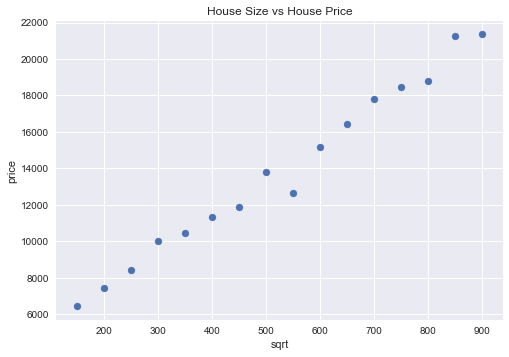

In [25]:
scatter1 = plt.scatter(example1.sqrt, example1.price)
plt.xlabel('sqrt')
plt.ylabel('price')
plt.title('House Size vs House Price')
plt.show()

In [12]:
example1.corr()

,sqrt,price
sqrt,1.000000,0.992551
price,0.992551,1.000000


#### Regression
The correlation between house price and house size is 0.99, which means there is a strong relationship between these two variables. Then, we establish the regression model.

In [13]:
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [15]:
from sklearn.linear_model import LinearRegression
regression1 = LinearRegression()
regression1.fit(x_train1, y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
a = regression1.intercept_
b = regression1.coef_
print('Intercept a=', a,'Regression coefficient b=', b)

Intercept a= 3487.84775087 Regression coefficient b= [ 20.24373702]


From the results above, we got the linear regression equation. Now, we can calculate the house price through this euquation.  
$$y = 3487.85 + 20.24x$$

#### R_squared

In [17]:
regression1.score(x_train1, y_train1)

0.99685048026669165

This is called R_squared. The R_squared statistic provides a measure of how well the model is fitting the actual data. The R_squared is a measure of the linear relationship between our predictor variable (house size) and our response variable (house price). It always lies between 0 and 1. Here, the R_squared we get is 0.98, which means this linear regression model is good.

#### Prediction

In [21]:
y_pred1 = regression1.predict(x_test1)

In [22]:
y_pred1

array([  7536.59515571,  12597.52941176,  14621.90311419,  15634.0899654 ,
        19682.83737024])

In [24]:
y_test1

array([ 7455, 11900, 12660, 15200, 18770])

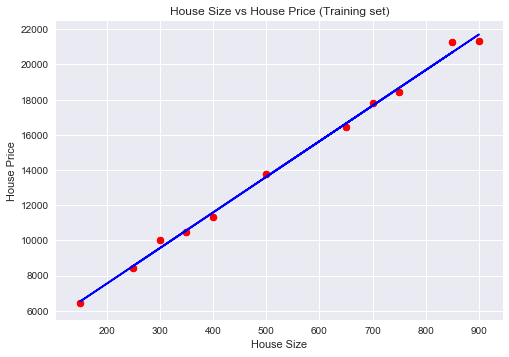

In [27]:
plt.scatter(x_train1,y_train1, color = 'red')
plt.plot(x_train1, regression1.predict(x_train1), color = 'blue')
plt.title('House Size vs House Price (Training set)')
plt.xlabel("House Size")
plt.ylabel("House Price")
plt.show()

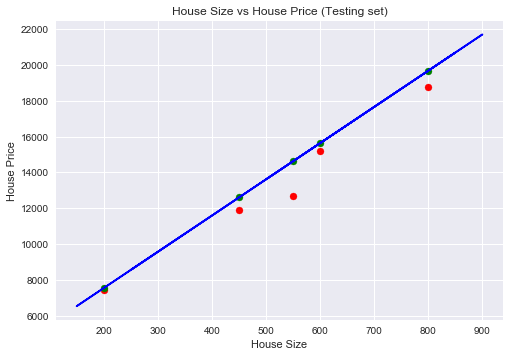

In [28]:
plt.scatter(x_test1, y_test1, color = 'red')
plt.scatter(x_test1, y_pred1, color = 'green')
plt.plot(x_train1, regression1.predict(x_train1), color = 'blue')
plt.title('House Size vs House Price (Testing set)')
plt.xlabel("House Size")
plt.ylabel("House Price")
plt.show()

### Example 2. House Price Prediction in reality (Multiple Linear Regression)

In reality, there are many causes can influence the price of house, which means there are more than one explanatory variables.Let's look at a more complicated dataset of house price.

In [30]:
example2 = pd.read_csv('example2.csv')
print(example2.shape)

(21613, 21)


In [31]:
example2.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


We can see that there are 21 variables in the dataset. Before we analyze each variables, we need know more about the dataset. The first column in the dataset is id. It is unique for each records, so it is meaningless for our analysis. 

In [32]:
del example2['id']

In [33]:
example2.isnull().sum()
## Check null value

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Exploratory Data Analysis

Firstly, we devide the independent variables into categorical variables and continuous variables. In this analysis, we only use the continuous variables. Then, split the dataset into training and testing datasets.

In [34]:
cat = ['waterfront','view','condition','grade']
con = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','sqft_above','sqft_basement','yr_built','yr_renovated','sqft_living15','sqft_lot15']


#### Correlation analysis

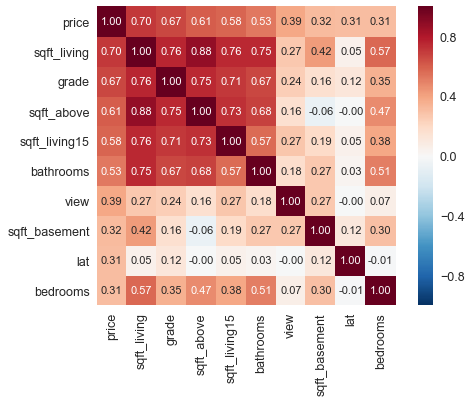

In [24]:
corrmat = train.corr()
cols = corrmat.nlargest(10, 'price')['price'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 11}, yticklabels=cols.values,
                 xticklabels=cols.values)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

We can see that: there are relationship between price and other variables. But high correlation can be detected between sqft_above and sqft_living. 

In [37]:
x = example2[con].values
y = example2['price'].values

In [39]:
from sklearn.model_selection import train_test_split
x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size = 0.3, random_state = 0)

### Choosing the labels

In [40]:
import pylab
import scipy.stats as stats
from math import sqrt
from sklearn.metrics import mean_squared_error as mse

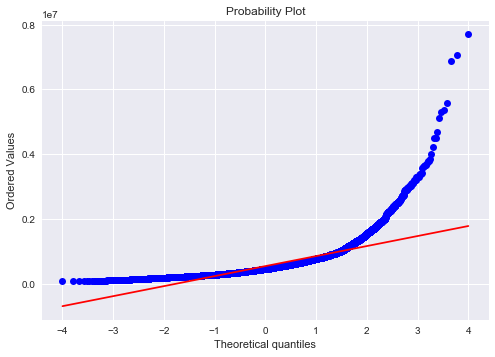

In [41]:
stats.probplot(example2['price'], dist = 'norm', plot = pylab)
pylab.show()

The QQ Plot reveals a non-normalized distribution of the label. Let's try logrithm transform.

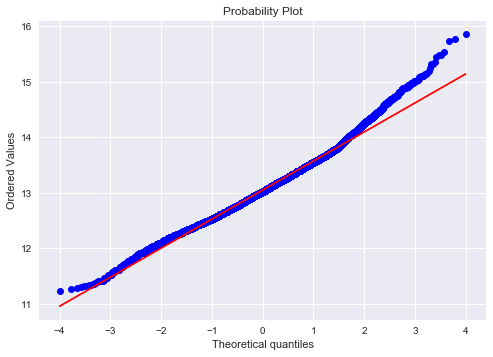

In [42]:
stats.probplot(np.log(example2['price']), dist = 'norm', plot = pylab)
pylab.show()

It is much better. Let's use it as the label in regression Model.

### Regression

In [49]:
y_train3 = np.log(y_train2)
y_test3 = np.log(y_test2)

In [50]:
regression2 = LinearRegression()
regression2.fit(x_train2,y_train3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [51]:
intercept = regression2.intercept_
print('Intercept =', intercept)

Intercept = 21.6493065304


In [52]:
coefficient = regression2.coef_
print('Regression coefficient =', coefficient)

Regression coefficient = [ -4.90619574e-02   1.11638524e-01   1.80743178e-04   4.07839227e-07
   1.73780965e-01   4.76846713e-05   1.33058506e-04  -5.00667010e-03
   1.67048192e-05   2.21618012e-04  -8.93857124e-07]


In [54]:
y_pred = np.exp(regression2.predict(x_test2))
y_pred

array([  390199.49404274,  1467122.39431223,   397180.88038548, ...,
         467810.29361041,   338379.0375831 ,   275053.28947617])

In [55]:
y_test2

array([  297000.,  1578000.,   562100., ...,   380000.,   268000.,
         206000.])

In [56]:
accuracy = sqrt(mse(y_pred, y_test2))

In [57]:
accuracy

230248.19372121384

After fitting the model and doing prediction in training set, we get very low prediction accuracy, which means this is not a good model. This is a basic mutiple linear regression model. Based on the variable analysis and the basic model, we can imporve our model or use other methods to establish a better model to make better prediction.